# NYC ACS DATA ANALYSIS

I had originally worked on a notebook for 8 hours and all of my commands end up getting erase somehow at the end. Earlier, I had also had issued opening data I had save to my jupyterhub, saying that it couldn't find it. I unfotunatly don't have the time to recreate the notebook to the same degreee. So I'll just be running commands without much explaining and streamlining as much as possible. Originally, I had created maps for each demographic data using natural breaks, quantiles, and natural breaks. Photos of these maps can be found on my group github. I had also conducted histograms for each set of data. All demographic data is not normally distributed, therefore we decided Natural breaks would be best. Therefore, in this notebook I will only be showing natural breaks. 

## Race

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt

In [2]:
race_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ACS_Data/race_acs2019_5yr_B03002_14000US36061018300.geojson')
race_acs.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,331.0,4457.0,313.0,603.0,172.0,3601.0,296.0,...,17.0,486.0,147.0,68.0,56.0,0.0,17.0,68.0,56.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,471.0,1088.0,270.0,33.0,29.0,920.0,277.0,...,12.0,936.0,440.0,171.0,150.0,71.0,116.0,100.0,96.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,558.0,1855.0,473.0,387.0,174.0,1264.0,465.0,...,17.0,880.0,365.0,215.0,169.0,50.0,58.0,165.0,152.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,398.0,2373.0,392.0,213.0,122.0,2021.0,374.0,...,17.0,1079.0,321.0,172.0,115.0,132.0,109.0,40.0,49.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,341.0,1427.0,225.0,340.0,96.0,937.0,184.0,...,12.0,967.0,217.0,156.0,109.0,127.0,103.0,29.0,30.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."


In [3]:
race_acs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
race_acs= race_acs.to_crs(epsg=3857)

In [5]:
race_acs.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [6]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

race_acs= race_acs[columns_to_keep]

In [7]:
race_acs.columns = ['GEOID',
 'name',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']
race_acs.head()

,GEOID,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,35.0,2407.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,0.0,3444.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,74.0,3661.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,25.0,3452.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,56.0,1714.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [8]:
race_acs['Percent Non Hispanic'] = race_acs['Non Hispanic']/race_acs['Total_race']*100
race_acs['Percent Hispanic'] = race_acs['Hispanic']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic White'] = race_acs['Non Hispanic White']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Black'] = race_acs['Non Hispanic Black']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic American Indian and Alaska Native'] =race_acs['Non Hispanic American Indian and Alaska Native']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Asian'] = race_acs['Non Hispanic Asian']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] =race_acs['Non Hispanic Native Hawaiian and Other Pacific Islander']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Some other race'] = race_acs['Non Hispanic Some other race']/race_acs['Total_race']*100
race_acs['Percent Non Hispanic Two or more races'] = race_acs['Non Hispanic Two or more races']/race_acs['Total_race']*100
race_acs.sample(5)

,GEOID,name,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
1515,14000US36081016600,"Census Tract 166, Queens, NY",3984.0,2699.0,129.0,454.0,84.0,1378.0,0.0,414.0,...,"MULTIPOLYGON (((-8217971.831 4966220.890, -821...",67.745984,32.254016,3.237952,11.395582,2.108434,34.588353,0.000000,10.391566,6.024096
1163,14000US36061006500,"Census Tract 65, New York, NY",6337.0,5887.0,4839.0,164.0,0.0,798.0,0.0,0.0,...,"MULTIPOLYGON (((-8237950.896 4972369.500, -823...",92.898848,7.101152,76.361054,2.587975,0.000000,12.592709,0.000000,0.000000,1.357109
1337,14000US36061023000,"Census Tract 230, New York, NY",8717.0,6560.0,734.0,5413.0,0.0,118.0,101.0,33.0,...,"MULTIPOLYGON (((-8231484.904 4985687.665, -823...",75.255248,24.744752,8.420328,62.097052,0.000000,1.353677,1.158656,0.378571,1.846966
1266,14000US36061016002,"Census Tract 160.02, New York, NY",3421.0,2936.0,2249.0,78.0,17.0,526.0,0.0,40.0,...,"MULTIPOLYGON (((-8232691.718 4981157.845, -823...",85.822859,14.177141,65.741011,2.280035,0.496931,15.375621,0.000000,1.169249,0.760012
880,14000US36047067000,"Census Tract 670, Kings, NY",2934.0,2516.0,550.0,1505.0,0.0,381.0,0.0,32.0,...,"MULTIPOLYGON (((-8229449.315 4955642.635, -822...",85.753238,14.246762,18.745740,51.295160,0.000000,12.985685,0.000000,1.090661,1.635992


Text(0.5, 1.0, 'Percent Non Hispanic Asian')

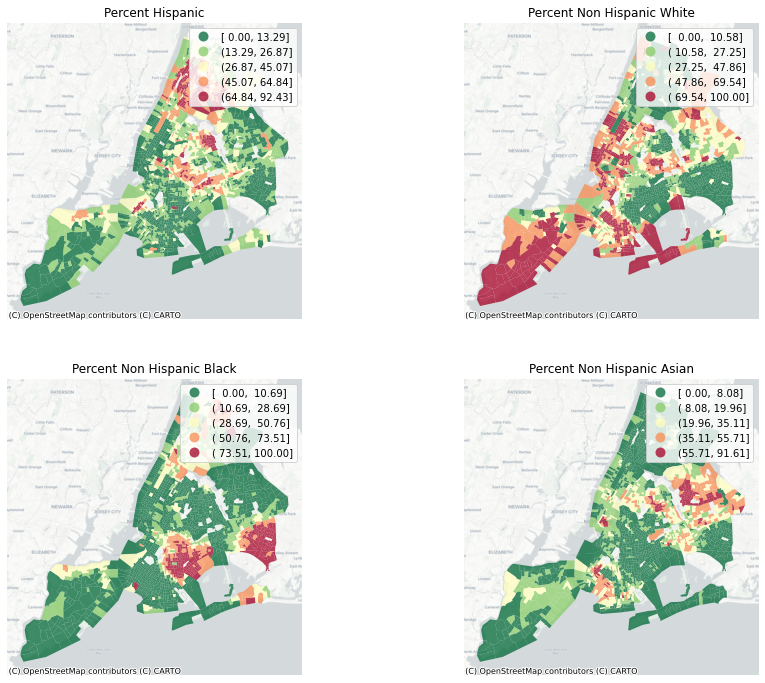

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(15, 12))


race_acs.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='Naturalbreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=axs[0,0], # this assigns the map to the subplot,
            legend=True
           )
ctx.add_basemap(axs[0,0],source=ctx.providers.CartoDB.Positron)
axs[0,0].axis("off")
axs[0,0].set_title("Percent Hispanic")


race_acs.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='Naturalbreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=axs[0,1], # this assigns the map to the subplot
            legend=True
           )

axs[0,1].axis("off")
axs[0,1].set_title("Percent Non Hispanic White")
ctx.add_basemap(axs[0,1],source=ctx.providers.CartoDB.Positron)

race_acs.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='Naturalbreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=axs[1,0], # this assigns the map to the subplot
            legend=True
           )
ctx.add_basemap(axs[1,0],source=ctx.providers.CartoDB.Positron)
axs[1,0].axis("off")
axs[1,0].set_title("Percent Non Hispanic Black")

race_acs.plot(column='Percent Non Hispanic Asian', 
            cmap='RdYlGn_r', 
            scheme='Naturalbreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=axs[1,1], # this assigns the map to the subplot
            legend=True
           )
ctx.add_basemap(axs[1,1],source=ctx.providers.CartoDB.Positron)
axs[1,1].axis("off")
axs[1,1].set_title("Percent Non Hispanic Asian")

# Older Adults (over 65)

In [10]:
age_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ACS_Data/age_acs2019_5yr_B01001_14000US36061018300.geojson')
age_acs.head()

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,331.0,6345.0,322.0,0.0,17.0,0.0,17.0,...,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,471.0,2193.0,323.0,150.0,81.0,118.0,105.0,...,77.0,131.0,68.0,57.0,46.0,25.0,28.0,80.0,56.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,558.0,2810.0,333.0,99.0,69.0,141.0,101.0,...,44.0,105.0,58.0,16.0,25.0,32.0,34.0,59.0,47.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,398.0,2422.0,292.0,182.0,94.0,159.0,69.0,...,48.0,174.0,92.0,196.0,91.0,70.0,48.0,76.0,55.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,341.0,1583.0,253.0,252.0,106.0,88.0,50.0,...,11.0,0.0,12.0,7.0,10.0,27.0,27.0,0.0,12.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."


In [11]:
age_acs= age_acs.to_crs(epsg=3857)

In [12]:
age_acs.columns.to_list()

['geoid',
 'name',
 'B01001001',
 'B01001001, Error',
 'B01001002',
 'B01001002, Error',
 'B01001003',
 'B01001003, Error',
 'B01001004',
 'B01001004, Error',
 'B01001005',
 'B01001005, Error',
 'B01001006',
 'B01001006, Error',
 'B01001007',
 'B01001007, Error',
 'B01001008',
 'B01001008, Error',
 'B01001009',
 'B01001009, Error',
 'B01001010',
 'B01001010, Error',
 'B01001011',
 'B01001011, Error',
 'B01001012',
 'B01001012, Error',
 'B01001013',
 'B01001013, Error',
 'B01001014',
 'B01001014, Error',
 'B01001015',
 'B01001015, Error',
 'B01001016',
 'B01001016, Error',
 'B01001017',
 'B01001017, Error',
 'B01001018',
 'B01001018, Error',
 'B01001019',
 'B01001019, Error',
 'B01001020',
 'B01001020, Error',
 'B01001021',
 'B01001021, Error',
 'B01001022',
 'B01001022, Error',
 'B01001023',
 'B01001023, Error',
 'B01001024',
 'B01001024, Error',
 'B01001025',
 'B01001025, Error',
 'B01001026',
 'B01001026, Error',
 'B01001027',
 'B01001027, Error',
 'B01001028',
 'B01001028, Error',
 

In [13]:
columns_to_keep_2 = ['geoid',
 'name',
 'B01001001',
 'B01001020',
 'B01001021',
 'B01001022',
 'B01001023',
 'B01001024',
 'B01001025',
 'B01001044',
 'B01001045',
 'B01001046',
 'B01001047',
'B01001048',
'B01001049',
 'geometry']

age_acs= age_acs[columns_to_keep_2]


In [14]:
age_acs.columns = ['GEOID',
 'name',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
  'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'geometry']
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,20.0,8.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,43.0,33.0,234.0,64.0,62.0,17.0,55.0,130.0,131.0,57.0,25.0,80.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,86.0,63.0,147.0,45.0,62.0,28.0,55.0,66.0,105.0,16.0,32.0,59.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,16.0,75.0,57.0,38.0,75.0,5.0,58.0,62.0,174.0,196.0,70.0,76.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,12.0,10.0,12.0,6.0,0.0,0.0,0.0,6.0,0.0,7.0,27.0,0.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [15]:
pop_over65 = ['Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
  'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above']

age_acs['Total Over 65']=age_acs[pop_over65].sum(axis=1)
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry,Total Over 65
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,20.0,8.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",47.0
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,43.0,33.0,234.0,64.0,62.0,17.0,55.0,130.0,131.0,57.0,25.0,80.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",931.0
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,86.0,63.0,147.0,45.0,62.0,28.0,55.0,66.0,105.0,16.0,32.0,59.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",764.0
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,16.0,75.0,57.0,38.0,75.0,5.0,58.0,62.0,174.0,196.0,70.0,76.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",902.0
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,12.0,10.0,12.0,6.0,0.0,0.0,0.0,6.0,0.0,7.0,27.0,0.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",80.0


In [16]:
age_acs['Percent Over 65'] = age_acs['Total Over 65']/age_acs['Total_age']*100
age_acs.head()

,GEOID,name,Total_age,Male 65 to 66,Male 67 to 69,Male 70 to 74,Male 75 to 79,Male 80 to 84,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry,Total Over 65,Percent Over 65
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,20.0,8.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",47.0,0.684732
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,43.0,33.0,234.0,64.0,62.0,17.0,55.0,130.0,131.0,57.0,25.0,80.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",931.0,20.542807
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,86.0,63.0,147.0,45.0,62.0,28.0,55.0,66.0,105.0,16.0,32.0,59.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",764.0,13.850616
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,16.0,75.0,57.0,38.0,75.0,5.0,58.0,62.0,174.0,196.0,70.0,76.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",902.0,15.484979
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,12.0,10.0,12.0,6.0,0.0,0.0,0.0,6.0,0.0,7.0,27.0,0.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",80.0,2.546960


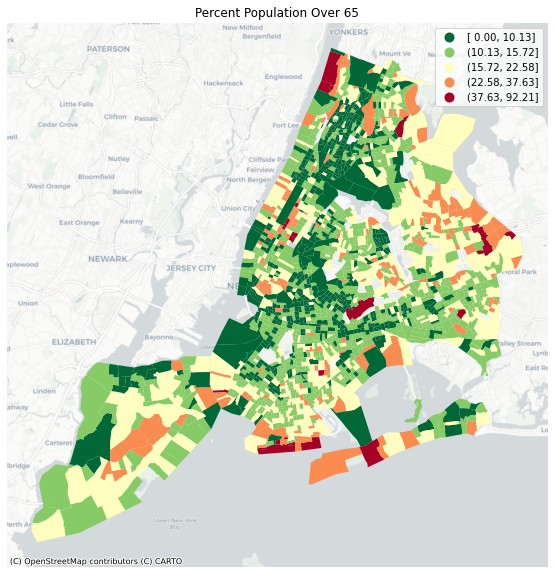

In [17]:
fig, ax=plt.subplots(figsize=(15,10))
age_acs.plot(ax=ax,
               column='Percent Over 65',
               legend=True,
                cmap='RdYlGn_r',
            scheme='Naturalbreaks')

ax.set_title("Percent Population Over 65")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Disability

In [18]:
disability_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ACS_Data/disability_acs2019_5yr_B18101_14000US36061018300.geojson')
disability_acs.head()

,geoid,name,B18101001,"B18101001, Error",B18101002,"B18101002, Error",B18101003,"B18101003, Error",B18101004,"B18101004, Error",...,"B18101035, Error",B18101036,"B18101036, Error",B18101037,"B18101037, Error",B18101038,"B18101038, Error",B18101039,"B18101039, Error",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,...,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,471.0,2193.0,323.0,150.0,81.0,0.0,12.0,...,60.0,223.0,92.0,162.0,75.0,37.0,45.0,125.0,76.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,558.0,2810.0,333.0,99.0,69.0,0.0,17.0,...,56.0,149.0,60.0,107.0,68.0,85.0,57.0,22.0,32.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5612.0,379.0,2300.0,283.0,182.0,94.0,0.0,17.0,...,50.0,221.0,96.0,288.0,100.0,184.0,76.0,104.0,73.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3130.0,338.0,1573.0,252.0,252.0,106.0,16.0,24.0,...,12.0,6.0,11.0,34.0,30.0,32.0,31.0,2.0,7.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."


In [19]:
disability_acs= disability_acs.to_crs(epsg=3857)

In [20]:
disability_acs.columns.to_list()

['geoid',
 'name',
 'B18101001',
 'B18101001, Error',
 'B18101002',
 'B18101002, Error',
 'B18101003',
 'B18101003, Error',
 'B18101004',
 'B18101004, Error',
 'B18101005',
 'B18101005, Error',
 'B18101006',
 'B18101006, Error',
 'B18101007',
 'B18101007, Error',
 'B18101008',
 'B18101008, Error',
 'B18101009',
 'B18101009, Error',
 'B18101010',
 'B18101010, Error',
 'B18101011',
 'B18101011, Error',
 'B18101012',
 'B18101012, Error',
 'B18101013',
 'B18101013, Error',
 'B18101014',
 'B18101014, Error',
 'B18101015',
 'B18101015, Error',
 'B18101016',
 'B18101016, Error',
 'B18101017',
 'B18101017, Error',
 'B18101018',
 'B18101018, Error',
 'B18101019',
 'B18101019, Error',
 'B18101020',
 'B18101020, Error',
 'B18101021',
 'B18101021, Error',
 'B18101022',
 'B18101022, Error',
 'B18101023',
 'B18101023, Error',
 'B18101024',
 'B18101024, Error',
 'B18101025',
 'B18101025, Error',
 'B18101026',
 'B18101026, Error',
 'B18101027',
 'B18101027, Error',
 'B18101028',
 'B18101028, Error',
 

In [21]:
columns_to_keep_3 = ['geoid',
 'name',
 'B18101001',
 'B18101004',
 'B18101007',
 'B18101010',
 'B18101013',
 'B18101016',
 'B18101019',
 'B18101023',
 'B18101026',
 'B18101029',
 'B18101032',
'B18101035',
'B18101037',
 'geometry']

disability_acs= disability_acs[columns_to_keep_3]
disability_acs.head()

,geoid,name,B18101001,B18101004,B18101007,B18101010,B18101013,B18101016,B18101019,B18101023,B18101026,B18101029,B18101032,B18101035,B18101037,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,0.0,17.0,71.0,123.0,80.0,81.0,0.0,35.0,64.0,219.0,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,0.0,86.0,76.0,61.0,53.0,69.0,0.0,0.0,35.0,145.0,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5612.0,0.0,93.0,32.0,127.0,86.0,0.0,0.0,9.0,13.0,184.0,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3130.0,16.0,25.0,106.0,91.0,0.0,0.0,0.0,37.0,40.0,145.0,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [22]:
disability_acs.columns = ['GEOID',
 'name',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
  'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'geometry']
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,0.0,17.0,71.0,123.0,80.0,81.0,0.0,35.0,64.0,219.0,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,0.0,86.0,76.0,61.0,53.0,69.0,0.0,0.0,35.0,145.0,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5612.0,0.0,93.0,32.0,127.0,86.0,0.0,0.0,9.0,13.0,184.0,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3130.0,16.0,25.0,106.0,91.0,0.0,0.0,0.0,37.0,40.0,145.0,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [23]:
pop_disability = ['Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
  'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above']

disability_acs['Total Population with Disabilities']=disability_acs[pop_disability].sum(axis=1)
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",0.0
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,0.0,17.0,71.0,123.0,80.0,81.0,0.0,35.0,64.0,219.0,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",945.0
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,0.0,86.0,76.0,61.0,53.0,69.0,0.0,0.0,35.0,145.0,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",709.0
3,14000US36005001600,"Census Tract 16, Bronx, NY",5612.0,0.0,93.0,32.0,127.0,86.0,0.0,0.0,9.0,13.0,184.0,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",881.0
4,14000US36005001900,"Census Tract 19, Bronx, NY",3130.0,16.0,25.0,106.0,91.0,0.0,0.0,0.0,37.0,40.0,145.0,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",494.0


In [24]:
disability_acs['Percent with Disabilities'] = disability_acs['Total Population with Disabilities']/disability_acs['Total_disabilitydata']*100
disability_acs.head()

,GEOID,name,Total_disabilitydata,Male under 5 years,Male 5 to 17,Male 18 to 34,Male 35 to 64,Male 65 to 74,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities,Percent with Disabilities
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,0.0,17.0,71.0,123.0,80.0,81.0,0.0,35.0,64.0,219.0,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",945.0,20.851721
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,0.0,86.0,76.0,61.0,53.0,69.0,0.0,0.0,35.0,145.0,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",709.0,12.853517
3,14000US36005001600,"Census Tract 16, Bronx, NY",5612.0,0.0,93.0,32.0,127.0,86.0,0.0,0.0,9.0,13.0,184.0,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",881.0,15.698503
4,14000US36005001900,"Census Tract 19, Bronx, NY",3130.0,16.0,25.0,106.0,91.0,0.0,0.0,0.0,37.0,40.0,145.0,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",494.0,15.782748


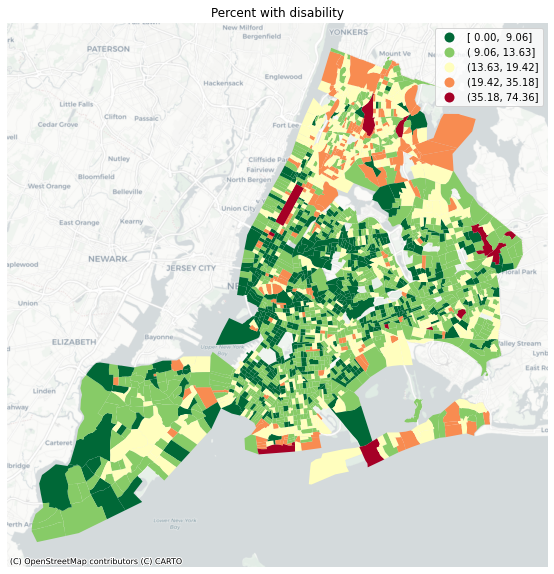

In [25]:
fig, ax=plt.subplots(figsize=(15,10))
disability_acs.plot(ax=ax,
               column='Percent with Disabilities',
               legend=True,
                cmap='RdYlGn_r',
            scheme='Naturalbreaks')

ax.set_title("Percent with disability")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Poverty

In [26]:
poverty_acs=gpd.read_file('/home/jovyan/206a assigment/Midterm/NYC_ACS_Data/poverty_acs2019_5yr_B17001_14000US36061018300.geojson')
poverty_acs.head()

,geoid,name,B17001001,"B17001001, Error",B17001002,"B17001002, Error",B17001003,"B17001003, Error",B17001004,"B17001004, Error",...,"B17001055, Error",B17001056,"B17001056, Error",B17001057,"B17001057, Error",B17001058,"B17001058, Error",B17001059,"B17001059, Error",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,...,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,471.0,1017.0,366.0,441.0,211.0,44.0,52.0,...,73.0,158.0,70.0,190.0,86.0,294.0,100.0,162.0,75.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5503.0,555.0,462.0,260.0,181.0,113.0,0.0,17.0,...,128.0,478.0,149.0,311.0,113.0,214.0,75.0,95.0,63.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5603.0,377.0,1522.0,495.0,669.0,271.0,44.0,56.0,...,92.0,331.0,97.0,298.0,114.0,210.0,102.0,173.0,82.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",2983.0,343.0,860.0,251.0,420.0,176.0,52.0,39.0,...,63.0,143.0,52.0,64.0,46.0,6.0,11.0,32.0,31.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."


In [27]:
poverty_acs= poverty_acs.to_crs(epsg=3857)

In [28]:
poverty_acs.columns.to_list()

['geoid',
 'name',
 'B17001001',
 'B17001001, Error',
 'B17001002',
 'B17001002, Error',
 'B17001003',
 'B17001003, Error',
 'B17001004',
 'B17001004, Error',
 'B17001005',
 'B17001005, Error',
 'B17001006',
 'B17001006, Error',
 'B17001007',
 'B17001007, Error',
 'B17001008',
 'B17001008, Error',
 'B17001009',
 'B17001009, Error',
 'B17001010',
 'B17001010, Error',
 'B17001011',
 'B17001011, Error',
 'B17001012',
 'B17001012, Error',
 'B17001013',
 'B17001013, Error',
 'B17001014',
 'B17001014, Error',
 'B17001015',
 'B17001015, Error',
 'B17001016',
 'B17001016, Error',
 'B17001017',
 'B17001017, Error',
 'B17001018',
 'B17001018, Error',
 'B17001019',
 'B17001019, Error',
 'B17001020',
 'B17001020, Error',
 'B17001021',
 'B17001021, Error',
 'B17001022',
 'B17001022, Error',
 'B17001023',
 'B17001023, Error',
 'B17001024',
 'B17001024, Error',
 'B17001025',
 'B17001025, Error',
 'B17001026',
 'B17001026, Error',
 'B17001027',
 'B17001027, Error',
 'B17001028',
 'B17001028, Error',
 

In [29]:
columns_to_keep_4 = ['geoid',
 'name',
 'B17001001',
 'B17001002',
 'geometry']

poverty_acs= poverty_acs[columns_to_keep_4]
poverty_acs.head()

,geoid,name,B17001001,B17001002,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1017.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5503.0,462.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5603.0,1522.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",2983.0,860.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [30]:
poverty_acs.columns = ['GEOID',
 'name',
 'Total_povertydata',
 'Total living in poverty',
 'geometry']
poverty_acs.head()

,GEOID,name,Total_povertydata,Total living in poverty,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1017.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5503.0,462.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5603.0,1522.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",2983.0,860.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822..."


In [31]:
poverty_acs['Percent Living in Poverty'] = poverty_acs['Total living in poverty']/poverty_acs['Total_povertydata']*100
poverty_acs.head()

,GEOID,name,Total_povertydata,Total living in poverty,geometry,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1017.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY",5503.0,462.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY",5603.0,1522.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY",2983.0,860.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",28.830037


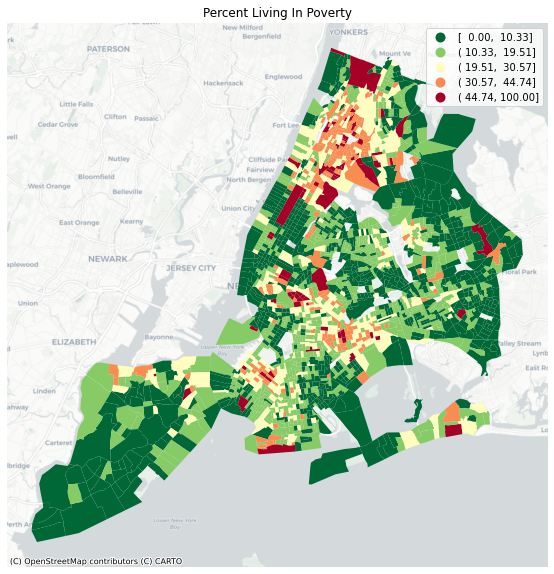

In [32]:
fig, ax=plt.subplots(figsize=(15,10))
poverty_acs.plot(ax=ax,
               column='Percent Living in Poverty',
               legend=True,
                cmap='RdYlGn_r',
            scheme='Naturalbreaks')

ax.set_title("Percent Living In Poverty")

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Okay, yay! Finally got some baseic maps for each dataset. Next step will be mergin the data and maybe creating some graphs.

## Mergin Data

In [33]:
race_age= race_acs.merge(age_acs, on='GEOID')
race_age.head()

,GEOID,name_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Male 85 and above,Female 65 to 66,Female67 to 69,Female 70 to 74,Female 75 to 79,Female 80 to 84,Female 85 and above,geometry_y,Total Over 65,Percent Over 65
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,0.0,9.0,10.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",47.0,0.684732
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,17.0,55.0,130.0,131.0,57.0,25.0,80.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",931.0,20.542807
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,28.0,55.0,66.0,105.0,16.0,32.0,59.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",764.0,13.850616
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,5.0,58.0,62.0,174.0,196.0,70.0,76.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",902.0,15.484979
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,0.0,0.0,6.0,0.0,7.0,27.0,0.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",80.0,2.546960


In [34]:
race_age_disability= race_age.merge(disability_acs, on='GEOID')
race_age_disability.head()

,GEOID,name_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Male 75 and above,Female under 5 years,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,geometry,Total Population with Disabilities,Percent with Disabilities
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,81.0,0.0,35.0,64.0,219.0,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",945.0,20.851721
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,69.0,0.0,0.0,35.0,145.0,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",709.0,12.853517
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,0.0,0.0,9.0,13.0,184.0,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",881.0,15.698503
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,0.0,0.0,37.0,40.0,145.0,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",494.0,15.782748


In [35]:
nyc_demographics= race_age_disability.merge(poverty_acs, on='GEOID')
nyc_demographics.head()

,GEOID,name_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Female 65 to 74,Female 75 and above,geometry_x,Total Population with Disabilities,Percent with Disabilities,name_y,Total_povertydata,Total living in poverty,geometry_y,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",0.0,NaN,"Census Tract 1, Bronx, NY",0.0,0.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,93.0,162.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",945.0,20.851721,"Census Tract 2, Bronx, NY",4532.0,1017.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,77.0,107.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",709.0,12.853517,"Census Tract 4, Bronx, NY",5503.0,462.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,49.0,288.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",881.0,15.698503,"Census Tract 16, Bronx, NY",5603.0,1522.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,0.0,34.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",494.0,15.782748,"Census Tract 19, Bronx, NY",2983.0,860.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",28.830037


In [36]:
nyc_demographics.columns.to_list()

['GEOID',
 'name_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry_x',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'name_y',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'geometry_y',
 'Total Over 65',
 'Percent Over 65',
 'name_x

In [37]:
columns_to_keep_5= ['GEOID',
 'name_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry_x',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty']
nyc_demographics= nyc_demographics[columns_to_keep_5]
nyc_demographics.head()

,GEOID,name_x,name_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,...,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,Total Population with Disabilities,Percent with Disabilities,Total_povertydata,Total living in poverty,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY","Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY","Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,...,35.0,64.0,219.0,93.0,162.0,945.0,20.851721,4532.0,1017.0,22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY","Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,...,0.0,35.0,145.0,77.0,107.0,709.0,12.853517,5503.0,462.0,8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY","Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,...,9.0,13.0,184.0,49.0,288.0,881.0,15.698503,5603.0,1522.0,27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY","Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,...,37.0,40.0,145.0,0.0,34.0,494.0,15.782748,2983.0,860.0,28.830037


In [38]:
nyc_demographics.columns.to_list()

['GEOID',
 'name_x',
 'name_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry_x',
 'geometry_x',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_

In [39]:
nyc_demographics.columns= ['GEOID',
 'name',
 'name_x',
 'Total_race',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry',
 'geometry_x',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty']
nyc_demographics.head()

,GEOID,name,name_x,Total_race,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,...,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,Total Population with Disabilities,Percent with Disabilities,Total_povertydata,Total living in poverty,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY","Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY","Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,...,35.0,64.0,219.0,93.0,162.0,945.0,20.851721,4532.0,1017.0,22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY","Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,...,0.0,35.0,145.0,77.0,107.0,709.0,12.853517,5503.0,462.0,8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY","Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,...,9.0,13.0,184.0,49.0,288.0,881.0,15.698503,5603.0,1522.0,27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY","Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,...,37.0,40.0,145.0,0.0,34.0,494.0,15.782748,2983.0,860.0,28.830037


In [40]:
columns_to_keep_6=  ['GEOID',
 'name',
 'Total_race',
  'geometry',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Total_age',
 'Male 65 to 66',
 'Male 67 to 69',
 'Male 70 to 74',
 'Male 75 to 79',
 'Male 80 to 84',
 'Male 85 and above',
 'Female 65 to 66',
 'Female67 to 69',
 'Female 70 to 74',
 'Female 75 to 79',
 'Female 80 to 84',
 'Female 85 and above',
 'Total Over 65',
 'Percent Over 65',
 'Total_disabilitydata',
 'Male under 5 years',
 'Male 5 to 17',
 'Male 18 to 34',
 'Male 35 to 64',
 'Male 65 to 74',
 'Male 75 and above',
 'Female under 5 years',
 'Female 5 to 17',
 'Female 18 to 34',
 'Female 35 to 64',
 'Female 65 to 74',
 'Female 75 and above',
 'Total Population with Disabilities',
 'Percent with Disabilities',
 'Total_povertydata',
 'Total living in poverty',
 'Percent Living in Poverty']

nyc_demographics= nyc_demographics[columns_to_keep_6]
nyc_demographics.head()

,GEOID,name,Total_race,geometry,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,...,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,Total Population with Disabilities,Percent with Disabilities,Total_povertydata,Total living in poverty,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",4457.0,603.0,3601.0,18.0,181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",1088.0,33.0,920.0,0.0,75.0,0.0,...,35.0,64.0,219.0,93.0,162.0,945.0,20.851721,4532.0,1017.0,22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",1855.0,387.0,1264.0,0.0,121.0,0.0,...,0.0,35.0,145.0,77.0,107.0,709.0,12.853517,5503.0,462.0,8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",2373.0,213.0,2021.0,0.0,64.0,0.0,...,9.0,13.0,184.0,49.0,288.0,881.0,15.698503,5603.0,1522.0,27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",1427.0,340.0,937.0,0.0,72.0,0.0,...,37.0,40.0,145.0,0.0,34.0,494.0,15.782748,2983.0,860.0,28.830037


In [41]:
nyc_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2166
Data columns (total 55 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   GEOID                                                            2167 non-null   object  
 1   name                                                             2167 non-null   object  
 2   Total_race                                                       2167 non-null   float64 
 3   geometry                                                         2167 non-null   geometry
 4   Non Hispanic                                                     2167 non-null   float64 
 5   Non Hispanic White                                               2167 non-null   float64 
 6   Non Hispanic Black                                               2167 non-null   float64 
 7   Non Hispanic American Indian and 

In [42]:
nyc_demographics= gpd.GeoDataFrame(nyc_demographics, geometry='geometry').copy()
nyc_demographics.head()

,GEOID,name,Total_race,geometry,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,...,Female 5 to 17,Female 18 to 34,Female 35 to 64,Female 65 to 74,Female 75 and above,Total Population with Disabilities,Percent with Disabilities,Total_povertydata,Total living in poverty,Percent Living in Poverty
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,"MULTIPOLYGON (((-8226256.784 4982171.364, -822...",4457.0,603.0,3601.0,18.0,181.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,"MULTIPOLYGON (((-8222638.455 4985023.105, -822...",1088.0,33.0,920.0,0.0,75.0,0.0,...,35.0,64.0,219.0,93.0,162.0,945.0,20.851721,4532.0,1017.0,22.440424
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,"MULTIPOLYGON (((-8222012.728 4985134.009, -822...",1855.0,387.0,1264.0,0.0,121.0,0.0,...,0.0,35.0,145.0,77.0,107.0,709.0,12.853517,5503.0,462.0,8.395421
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,"MULTIPOLYGON (((-8222331.881 4985717.084, -822...",2373.0,213.0,2021.0,0.0,64.0,0.0,...,9.0,13.0,184.0,49.0,288.0,881.0,15.698503,5603.0,1522.0,27.164019
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,"MULTIPOLYGON (((-8230050.441 4984044.586, -822...",1427.0,340.0,937.0,0.0,72.0,0.0,...,37.0,40.0,145.0,0.0,34.0,494.0,15.782748,2983.0,860.0,28.830037


In [43]:
nyc_demographics.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
nyc_demographics.to_file('NYC_Demographics.geojson')